In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Quarterly.csv")

In [35]:
df.columns=['year', 'Pre_completion', 'Post_completion', 'STEM_extension', 'Undifferentiated']

In [80]:
df.Undifferentiated = df.Undifferentiated.str.replace(',', '').astype(float);

In [73]:
df.Pre_completion = df.Pre_completion.str.replace(',', '').astype(float);
df.Post_completion = df.Post_completion.str.replace(',', '').astype(float);
df.STEM_extension = df.STEM_extension.str.replace(',', '').astype(float);

In [81]:
df1 = df.loc[(df.year>=2005) & (df.year<=2013)]

In [82]:
df1 = df1.set_index('year')

In [83]:
df1 = df1.fillna(0)

In [84]:
df1

,Pre_completion,Post_completion,STEM_extension,Undifferentiated
year,,,,
2005,0.0,0.0,0.0,84961.0
2006,0.0,0.0,0.0,82686.0
2007,0.0,1.0,0.0,79717.0
2008,1318.0,26118.0,926.0,53287.0
2009,3318.0,81014.0,5864.0,0.0
2010,3024.0,82863.0,10326.0,0.0
2011,3097.0,88266.0,13041.0,0.0
2012,3205.0,94676.0,16446.0,0.0
2013,3500.0,99872.0,18955.0,0.0


In [87]:
df1 =df1.assign(total_opt = df1.Pre_completion+df1.Post_completion+df1.STEM_extension+df1.Undifferentiated)

In [91]:
df1.loc[df1.STEM_extension==0, "STEM_extension"] =np.nan

In [94]:
df1 = df1.assign(Non_stem = df1.total_opt-df1.STEM_extension)

In [100]:
df1=df1.reset_index()

In [101]:
df1

,year,Pre_completion,Post_completion,STEM_extension,Undifferentiated,total_opt,Non_stem
0,2005,0.0,0.0,NaN,84961.0,84961.0,NaN
1,2006,0.0,0.0,NaN,82686.0,82686.0,NaN
2,2007,0.0,1.0,NaN,79717.0,79718.0,NaN
3,2008,1318.0,26118.0,926.0,53287.0,81649.0,80723.0
4,2009,3318.0,81014.0,5864.0,0.0,90196.0,84332.0
5,2010,3024.0,82863.0,10326.0,0.0,96213.0,85887.0
6,2011,3097.0,88266.0,13041.0,0.0,104404.0,91363.0
7,2012,3205.0,94676.0,16446.0,0.0,114327.0,97881.0
8,2013,3500.0,99872.0,18955.0,0.0,122327.0,103372.0


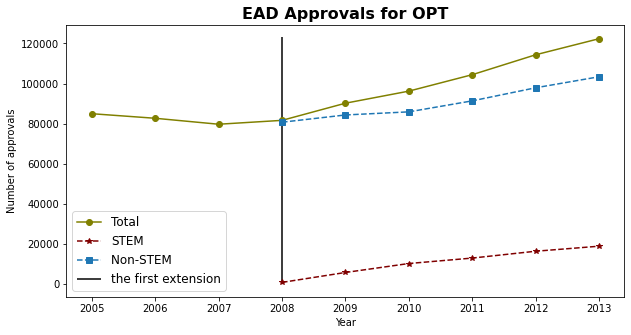

In [131]:
plt.figure(figsize=(10,5))
plt.plot(df1.year, df1.total_opt, color='#808000', marker='o', label="Total")
plt.plot(df1.year, df1.STEM_extension, color='#800000', marker='*', ls='dashed', label="STEM")
plt.plot(df1.year, df1.Non_stem, marker='s', ls="--", label="Non-STEM ")
plt.vlines(2008, -100, 123000.0, color='black', label="the first extension")
plt.legend(loc="lower left", fontsize='large')

plt.title("EAD Approvals for OPT", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of approvals")
plt.savefig('EAD Approvals for OPT')
plt.show()

<Figure size 432x288 with 0 Axes>